# Parametric Modeling on Wine dataset
Using parametric methods to predict the quality of wins based on other factors

## Import libraries, read & visualize dataset

In [201]:
import pandas as pd
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://www-users.cse.umn.edu/~sjguy/data/WhiteWine.txt')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Bar graph & Histogram of quality ratings and density:

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

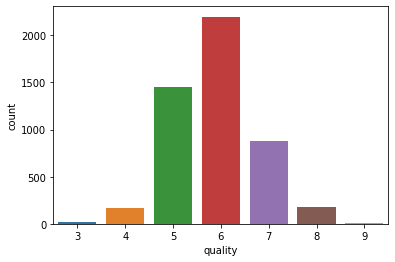

In [135]:
sns.countplot(df["quality"])

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='alcohol', ylabel='Density'>

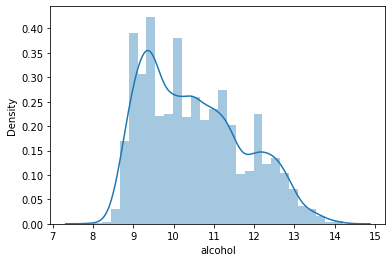

In [136]:
sns.distplot(df["alcohol"], kde=True)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='density', ylabel='Density'>

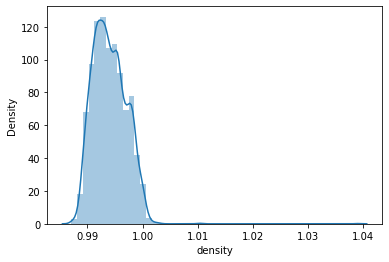

In [137]:
sns.distplot(df["density"], kde=True)

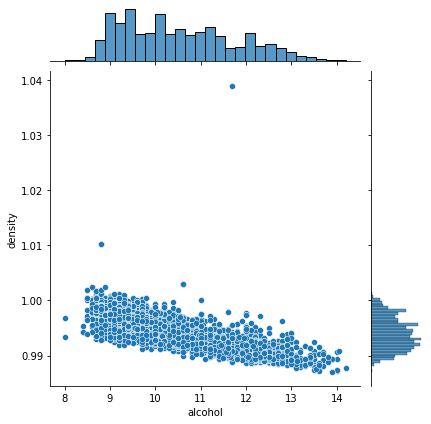

In [138]:
densAndAlc = df[['alcohol', 'density']]
sns.jointplot(data=densAndAlc, x='alcohol', y="density")

**The alcohol ratings and density appear to be skewed right, while the dotplot above appears to reveal a negative correlation between alcohol content and density**

## Normalize data, visualize a heatmap of correlations:

<AxesSubplot:>

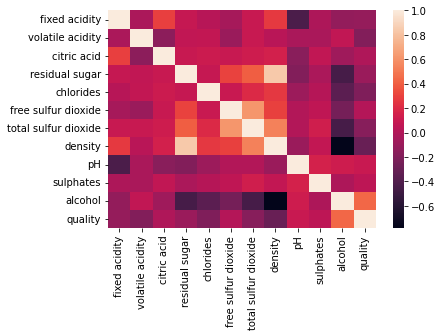

In [202]:
normalized_df=(df-df.mean())/df.std()
normalized_df
sns.heatmap(normalized_df.corr())

In [76]:
normalized_df.corr() # got correlations for model params as a reference point when printing out my learned parameters during development

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


Quality appears to be significantly correlated with alcohol, as well as density and volatile acidity. Density and alcohol seem to be very negatively correlated

## Declare models, loss function

In [140]:
def gradDec(model, n_params, x, y, lr=0.01, n_epochs=2000, print_rate=200):

  params = 0.1*torch.rand(n_params).float() #Random inital paramaters
  params.requires_grad = True

  for epoch in range(n_epochs):
    y_pred = model(params, x)
    loss_tenor = (y_pred - y)**2
    loss = loss_tenor.mean()
    loss.backward()
    with torch.no_grad():
      params -= lr*params.grad
      params.grad.zero_() 
    # if epoch%print_rate==0:
    #   print("epoch:",epoch,"loss=",loss.item())

  return params

In [141]:
def mean_squared_error(y, pred):
    squared_errors = (y - pred) ** 2
    mse = squared_errors.mean()
    return mse

In [142]:
# Linear Model:
def linModel(params, inputs):
  y_pred = params[0]*inputs[:,0] + params[1]
  return y_pred

features=["alcohol"]
x = torch.Tensor(normalized_df[features].values)
y = torch.Tensor(normalized_df["quality"].values)
linParams = gradDec(linModel,2,x,y,0.001)
linPreds = linModel(linParams, x).detach().numpy()

MSE for normalized multilinear model:  0.8101606965065002
tensor([0.4286, 0.0016], requires_grad=True)


<AxesSubplot:xlabel='quality', ylabel='preds'>

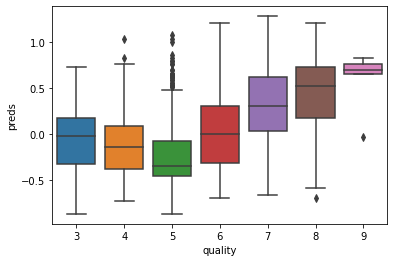

In [143]:
print("MSE for normalized multilinear model: ", mean_squared_error(y, linPreds).item())
print(linParams)
# Use denormalized version so axis more readable
linData = pd.DataFrame(data=df["quality"])
linData["preds"] = linPreds
sns.boxplot(data=linData, x="quality", y="preds")

For the linear model, I chose inputs via gradient descent, normalized data because inputs may have different values. 
The plot and mean squared accuracy are above, and the equation from one of my runs is:

y = .4286*alcohol + .0016

And this makes sense, since .4286 is close to the correlation value between alcohol and quaslity I got from .corr() earlier

In [145]:
features=["alcohol","chlorides","density"]
x = torch.Tensor(normalized_df[features].values)
y = torch.Tensor(normalized_df["quality"].values)
def multiLinearModel(params, inputs):
  y_pred = params[0]*inputs[:,0] + params[1]*inputs[:,1] + params[2]*inputs[:,2] - params[3]
  return y_pred

MSE for normalized multilinear model:  0.807881236076355


<AxesSubplot:xlabel='quality', ylabel='preds'>

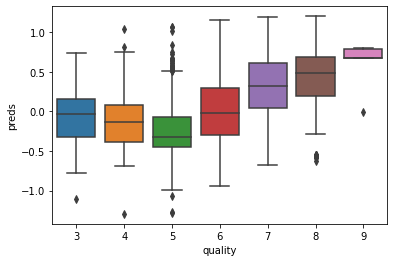

In [164]:
multiLinParams = gradDec(multiLinearModel,4,x,y,0.001)
preds = multiLinearModel(multiLinParams, x)
# print(multiLinParams)
print("MSE for normalized multilinear model: ", mean_squared_error(y, preds).item())
# Use denormalized version so axis more readable
multiLinData = pd.DataFrame(data=df["quality"])
multiLinPreds = preds.detach().numpy()
multiLinData["preds"] = multiLinPreds
sns.boxplot(data=multiLinData, x="quality", y="preds")

Multilinear: Inputs via gradient descent, normalized data because inputs may have different values, and I used normalized for most of this assignment, so the consistency makes things simpler for me. The plot and mean squared accuracy are above, and the equation from one of my runs is:

y = .3794 * alcohol - .0717 * chlorides  - .0125 * desnity + .0016

I am confident in this plot because 6, the most common quality rating, has an MSE centered around 0, with 5 slightly below it and 7 slightly above it.

In [169]:
# Nonlinear model:
features=["alcohol","chlorides","density", "volatile acidity", "fixed acidity"]
x = torch.Tensor(normalized_df[features].values)
y = torch.Tensor(normalized_df["quality"].values)
def nonLinearModel(params, inputs):
  y_pred = params[0]*inputs[:,0] + params[1]*inputs[:,1] + params[2]*inputs[:,2] + params[4]*(inputs[:,4]*inputs[:,3]) - params[3]*(inputs[:,2]*inputs[:,3]) - params[5] + params[6]
  return y_pred

tensor([ 0.3816, -0.0729, -0.0026,  0.0227, -0.0107,  0.0290,  0.0294],
       requires_grad=True)
MSE for normalized multilinear model:  0.8083398342132568


<AxesSubplot:xlabel='quality', ylabel='preds'>

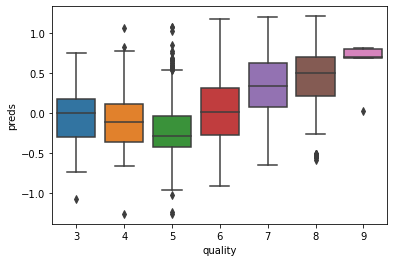

In [171]:
nonLinParams = gradDec(nonLinearModel,7,x,y,0.001)
preds = multiLinearModel(nonLinParams, x)
print(nonLinParams)
print("MSE for normalized multilinear model: ", mean_squared_error(y, preds).item())
# Use denormalized version so axis more readable
multiLinData = pd.DataFrame(data=df["quality"])
nonLinPreds = preds.detach().numpy()
multiLinData["preds"] = nonLinPreds
sns.boxplot(data=multiLinData, x="quality", y="preds")

For the nonlinear model, I chose inputs by looking at the correlation table for high correlates with quality, and things with significant negative correlations between each other, data was normalized here to help complex interactions between two or more features be more accurate. The plot and mean squared accuracy (MSE) are above, and the equation from one of my runs is:

y = .3893*alcohol - .0686*chlorides + .0028*density - .0233*(density * volatile acidity) + .0110*(volatile acidity * fixed acidity) - .0363 + .0367

While the intuitive deicisoin is to have a parameter to model the interaction between density and alcohol, but when I tested that combination, I got low MSE for my model. So, to a degree, this equation is the result of some semi-informed guessing and checking to get a low MSE. An interesting thing about this equation is that it both adds and then subtracts constants, but when one removes one of those parameters as a constant from the equation, the MSE of the model increases.





# Testing Accuracy

In [178]:
def getAcc(actual, preds, t):
    yDiff = np.abs(actual - preds)
    return np.mean(yDiff.to_numpy() <= t)
# Convert so getAcc can be re-used in p4
ySeries = pd.Series(y)
for t in [0.25, 0.5, 1]:
    print(f"T-value: {t}")
    print(f"Linear Acc: {getAcc(ySeries, linPreds, t)}") 
    print(f"MultiLinear Acc: {getAcc(ySeries, multiLinPreds, t)}")
    print(f"NonLinear Acc: {getAcc(ySeries, nonLinPreds, t)}")


T-value: 0.25
Linear Acc: 0.18313597386688443
MultiLinear Acc: 0.18538178848509596
NonLinear Acc: 0.19293589220089832
T-value: 0.5
Linear Acc: 0.39363005308289095
MultiLinear Acc: 0.407309105757452
NonLinear Acc: 0.4022049816251531
T-value: 1
Linear Acc: 0.7895059207839935
MultiLinear Acc: 0.7835851367905268
NonLinear Acc: 0.782564311964067


The nonlinear model performed the best at low t-values, which I would consider to be the best metric in this scenario, while the multilinear performed decently and the linear lagged behind both for lower t-values. The difference is significant in t=.25, and it is clear in t=.5 that linear is not as accurate, however linear actually suprasses the other two at t=1 here.

# Cross-Validation on different models & t-values

In [179]:
qualityNorm = normalized_df["quality"]
features = ["alcohol","chlorides","density", "volatile acidity", "fixed acidity"]
featuresNorm = torch.Tensor(normalized_df[features].values)

indices = np.random.permutation(len(qualityNorm))
featuresNorm = featuresNorm[indices]
qualityNorm = qualityNorm[indices]

# Split data into k folds (k=5)
X_folds = np.array_split(featuresNorm, 5)
y_folds = np.array_split(qualityNorm, 5)

linAccArr = []
multiLinAccArr = []
nonLinAccArr = []

In [180]:
for i in range(5):
    # Split data for fold, tensorize:
    X_train = np.concatenate(X_folds[:i] + X_folds[i+1:])
    y_train = np.concatenate(y_folds[:i] + y_folds[i+1:])
    X_val = X_folds[i]
    y_val = y_folds[i]

    X_train = torch.Tensor(X_train)
    y_train = torch.Tensor(y_train)

    for t in [0.25, 0.5, 1]:
        # Linear
        linParams = gradDec(linModel,2,X_train,y_train,0.001)
        linPreds = linModel(linParams, X_val)
        linPreds = linPreds.detach().numpy()

        # Multi
        multiLinParams = gradDec(multiLinearModel,4,X_train,y_train,0.001)
        multiLinPreds = multiLinearModel(multiLinParams, X_val)
        multiLinPreds = multiLinPreds.detach().numpy()

        # NonLinear
        nonLinParams = gradDec(nonLinearModel,7,X_train,y_train,0.001)
        nonLinPreds = nonLinearModel(nonLinParams, X_val)
        nonLinPreds = nonLinPreds.detach().numpy()

        # Get accuracies:
        linAcc = getAcc(y_val, linPreds, t)
        multiLinAcc = getAcc(y_val, multiLinPreds, t)
        nonLinAcc = getAcc(y_val, nonLinPreds, t)

        # Append to accuracy arrays:
        linAccArr.append(linAcc)
        multiLinAccArr.append(multiLinAcc)
        nonLinAccArr.append(nonLinAcc)

        print(f"T-value: {t}")
        print(f"Linear Acc: {linAcc}") 
        print(f"MultiLinear Acc: {multiLinAcc}")
        print(f"NonLinear Acc: {nonLinAcc}")


T-value: 0.25
Linear Acc: 0.19489795918367347
MultiLinear Acc: 0.2
NonLinear Acc: 0.20612244897959184
T-value: 0.5
Linear Acc: 0.42244897959183675
MultiLinear Acc: 0.42346938775510207
NonLinear Acc: 0.4275510204081633
T-value: 1
Linear Acc: 0.7785714285714286
MultiLinear Acc: 0.7775510204081633
NonLinear Acc: 0.7693877551020408
T-value: 0.25
Linear Acc: 0.1846938775510204
MultiLinear Acc: 0.18877551020408162
NonLinear Acc: 0.19081632653061226
T-value: 0.5
Linear Acc: 0.38877551020408163
MultiLinear Acc: 0.3989795918367347
NonLinear Acc: 0.4122448979591837
T-value: 1
Linear Acc: 0.7969387755102041
MultiLinear Acc: 0.7908163265306123
NonLinear Acc: 0.7846938775510204
T-value: 0.25
Linear Acc: 0.17142857142857143
MultiLinear Acc: 0.1836734693877551
NonLinear Acc: 0.18877551020408162
T-value: 0.5
Linear Acc: 0.38877551020408163
MultiLinear Acc: 0.4
NonLinear Acc: 0.4153061224489796
T-value: 1
Linear Acc: 0.7969387755102041
MultiLinear Acc: 0.7918367346938775
NonLinear Acc: 0.78367346938775

In [194]:
# n=0 corresponds to t=.25, n=1 to t-.5, n=2 to t=1
def averageofN(arr, n):
    return sum(arr[n::3]) / len(arr[n::3])
def getT(arr, n):
  return arr[n::3]

# Get stdev, accuracies of model
lin25 = np.asarray(getT(linAccArr, 0))
multi25 = np.asarray(getT(multiLinAccArr, 0))
nonLin25 = np.asarray(getT(nonLinAccArr, 0))

lin50 = np.asarray(getT(linAccArr, 1))
multi50 = np.asarray(getT(multiLinAccArr, 1))
nonLin50 = np.asarray(getT(nonLinAccArr, 1))

lin100 = np.asarray(getT(linAccArr, 2))
multi100 = np.asarray(getT(multiLinAccArr, 2))
nonLin100 = np.asarray(getT(nonLinAccArr, 2))

# # Print results of validation 
# print("Accuracies of all runs (linear, multi, nonLinear): ")
# print(linAccArr)
# print(multiLinAccArr)
# print(nonLinAccArr)

In [197]:
print("\nAverages accuracies of runs (linear, multi, nonLinear): ")
print("\nAverages of t=.25 accuracies (linear, multi, nonLinear): ")
print(averageofN(linAccArr, 0))
print(averageofN(multiLinAccArr, 0))
print(averageofN(nonLinAccArr, 0))

print("\nAverages of t=.5 accuracies (linear, multi, nonLinear): ")
print(averageofN(linAccArr, 1))
print(averageofN(multiLinAccArr, 1))
print(averageofN(nonLinAccArr, 1))

print("\nAverages of t=1.0 accuracies (linear, multi, nonLinear): ")
print(averageofN(linAccArr, 2))
print(averageofN(multiLinAccArr, 2))
print(averageofN(nonLinAccArr, 2))

print("\nStandard deviations of runs (linear, multi, nonLinear): ")
print("\nStandard deviations of t=.25 accuracies (linear, multiLinear, nonLinear:")
print(lin25.std())
print(multi25.std())
print(nonLin25.std())

print("\nStandard deviations of t=.50 accuracies (linear, multiLinear, nonLinear:")
print(lin50.std())
print(multi50.std())
print(nonLin50.std())

print("\nStandard deviations of t=1.0 accuracies (linear, multiLinear, nonLinear:")
print(lin100.std())
print(multi100.std())
print(nonLin100.std())




Averages accuracies of runs (linear, multi, nonLinear): 

Averages of t=.25 accuracies (linear, multi, nonLinear): 
0.17966271288903712
0.1857870380021263
0.18987012987012986

Averages of t=.5 accuracies (linear, multi, nonLinear): 
0.3983248212461696
0.40751328927893943
0.41383961143190684

Averages of t=1.0 accuracies (linear, multi, nonLinear): 
0.78868795730754
0.7848089470721894
0.7786848304183778

Standard deviations of runs (linear, multi, nonLinear): 

Standard deviations of t=.25 accuracies (linear, multiLinear, nonLinear:
0.011011688299476727
0.010174034982249204
0.011387646496804455

Standard deviations of t=.50 accuracies (linear, multiLinear, nonLinear:
0.013374302398055924
0.00876213121040372
0.007880489793731387

Standard deviations of t=1.0 accuracies (linear, multiLinear, nonLinear:
0.007887319034315497
0.0056487039995541935
0.0055420562764339305


## SYNOPSIS:
Once again, the nonLinear model performs the best accuracy-wise when t-values are low, with Linear behind the other two. However, when t=1, linear surpasses the other two models in accuracy. The standard deviations of all model accuracies are low at t=.25, but at t-values .5 and 1, the standard deviation of the linear model's accuracies surpasses the other two significantly. This may imply that the linear model has a large variation in accuracies, particularly when the threshold for accuracy is high. This may lead someone to label the linear model with t=1 as somewhat unreliable/unpredictable.





# Testing KNN on data:

In [237]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# Split data, get training & testing
X = df.drop(['quality'], axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [239]:
# Get most accurate k-value for dataset
best_k, bestAcc = 0, 0
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=5, p=1)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    # Round to nearest whole number
    preds = np.round(preds)
    curAcc = getAcc(y_test, preds, 1.0)

    if curAcc > bestAcc:
        bestK = k
        bestAcc = curAcc
# Print results
print(f"Best k value: {bestK} with accuracy: {bestAcc}")

Best k value: 1 with accuracy: 0.9428571428571428
